The symbolic regressor did a great job with the target function we used, a cubic. In principle, a powerful aspect of genetic approaches is that they can be used when the functions they are optimizing are not particularly smooth. Consider the function |x-4|+4. It’s a simple function, but it has a kink in it. If you fit the function with the symbolic regressor using just “add” and “mul”, what do you expect to happen? What if you add “abs” for “absolute value” to the set of functions the algorithm can use in its symbolic expression? Modify the code to find out. (Without the absolute value, the system does very poorly because it can’t represent the target function. With absolute value, it still does poorly, presumably because the fitter needs to very precisely figure out where the “fold” happens. Even for genetic algorithms, it’s a hard space to search because of the discontinuity.)


In this example, we will be training a symbolic regression using genetic programming.  We will try to fit our model to a set of points.

To do this, we will use the library `gplearn` which we install and load with our other libraries below.

In [1]:
!pip install gplearn
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 51kB 2.3MB/s 


We'll put together some training points and write a "dofit" algorithm that's given y coordinates from those x coordinates. 

Our genetic-programming-based estimator, `est_gp` is a “symbolic regressor”. That is to say, we’re solving a regression problem by finding a symbolic expression---a little piece of a program.

The program it finds will use 'add' for add, 'mul' for multiply, and 'abs' for absolute value. A program can use as many of these operators as necessary. However, there’s a tradeoff in the search between accurately matching the training data and being parsimonious---using a small expression.  The parsimony_coefficient tells the genetic programming search how much weight to put on parsimony compared to accuracy. Parsimony coefficient can be any non-negative value, where smaller numbers for parsimony tend to result in much bigger programs created.

After fitting, the routine shows the resulting function and returns the learned symbolic expression.

In [13]:
X = np.random.uniform(-10, 10, (50,1))

def dofit(y, fs):
  est_gp = SymbolicRegressor(population_size=10000,parsimony_coefficient=0.01,
                           function_set=fs)
  est_gp.fit(X, y)
  X_lots = np.reshape(np.sort(np.random.uniform(-10, 10, 250)),(-1,1))
  y_gp = est_gp.predict(X_lots)

  plt.scatter(X, y)
  plt.plot(X_lots, y_gp)
  plt.title('Function')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  print(est_gp._program)

Fitting the curve with add and mul.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


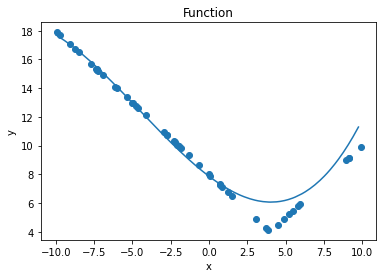

add(add(add(add(add(0.541, 0.929), add(add(mul(add(X0, -0.953), -0.795), add(0.579, 0.660)), add(0.957, 0.254))), add(0.653, add(0.719, 0.882))), 0.929), mul(mul(0.314, mul(add(X0, -0.177), mul(X0, 0.098))), add(mul(X0, 0.166), add(0.541, add(mul(-0.638, -0.795), add(0.957, 0.254))))))


In [14]:
dofit([abs(x-4)+4 for x in X],('add', 'mul'))

Fitting the curve with add and mul, but also abs.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


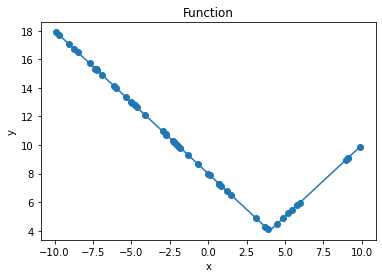

abs(add(add(abs(abs(0.702)), add(abs(abs(add(add(-0.981, add(-0.953, -0.687)), add(add(X0, -0.660), -0.726)))), abs(add(0.570, 0.583)))), add(0.986, abs(add(0.570, 0.583)))))


In [15]:
dofit([abs(x-4)+4 for x in X],('add', 'mul', 'abs'))